In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
Target = 85
Current_Weight = 90
Height = 1.8
Age = 25

In [4]:
df = pd.read_csv('data.csv')
df

,date,steps,heart_rate
0,13/10/2023,1673,89
1,14/10/2023,12071,83
2,15/10/2023,110,86
3,16/10/2023,5826,90
4,17/10/2023,5012,85
5,18/10/2023,3600,87
6,19/10/2023,7677,89
7,20/10/2023,6693,85
8,21/10/2023,279,85
9,22/10/2023,168,91


In [7]:
df['day_of_week'] = pd.to_datetime(df['date'], format='%d/%m/%Y').dt.dayofweek

In [8]:
df

,date,steps,heart_rate,day_of_week
0,13/10/2023,1673,89,4
1,14/10/2023,12071,83,5
2,15/10/2023,110,86,6
3,16/10/2023,5826,90,0
4,17/10/2023,5012,85,1
5,18/10/2023,3600,87,2
6,19/10/2023,7677,89,3
7,20/10/2023,6693,85,4
8,21/10/2023,279,85,5
9,22/10/2023,168,91,6


In [9]:
mondays = df[df['day_of_week'] == 0]
mondays

,date,steps,heart_rate,day_of_week
3,16/10/2023,5826,90,0
10,23/10/2023,478,98,0


In [6]:
import seaborn as sns
sns.lmplot(x=df['steps'], y=df['steps'],  order=2, ci=None)

TypeError: Missing required keyword argument `data`.

In [ ]:
df

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(df[['day_of_week']], df['steps'])
next_monday = 4
predicted_steps = model.predict([[next_monday]])
predicted_steps

c:\Users\SAJITH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4076.55357143])

Linear Regression

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the dataset
data = pd.read_csv('data.csv')  # Replace 'your_dataset.csv' with the actual dataset path

# Split the data into features and target
X = data[['heart_rate']]
y = data['steps']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)


In [19]:
predictions,y_test

(array([4298.20531154, 3431.13789581, 4876.25025536]),
 9      168
 11     608
 0     1673
 Name: steps, dtype: int64)

In [20]:
from sklearn.metrics import accuracy_score
print(accuracy_score(predictions))

TypeError: missing a required argument: 'y_pred'

Classification


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Load the dataset
data = pd.read_csv('data.csv')  # Replace 'your_dataset.csv' with the actual dataset path

# Define a threshold for high and low steps
threshold = 5000  # Adjust this threshold as needed

# Create a binary target variable (high/low steps)
data['step_category'] = data['steps'].apply(lambda x: 'high' if x >= threshold else 'low')

# Split the data into features and target
X = data[['heart_rate']]
y = data['step_category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a decision tree classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)


In [32]:
y


0      low
1     high
2      low
3     high
4     high
5      low
6     high
7     high
8      low
9      low
10     low
11     low
12    high
13    high
Name: step_category, dtype: object

In [22]:
predictions

array(['high', 'high', 'high'], dtype=object)

In [23]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the dataset
data = pd.read_csv('data.csv')  # Replace 'your_dataset.csv' with the actual dataset path

# Set the date column as the index
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y')
data.set_index('date', inplace=True)

# Fit an exponential smoothing model
model = ExponentialSmoothing(data['steps'], trend='add', seasonal='add', seasonal_periods=7)
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=7)  # Predict the next 7 days, for example


c:\Users\SAJITH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\SAJITH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [24]:
predictions

2023-10-27    4848.450408
2023-10-28   -1515.313919
2023-10-29   -1635.593706
2023-10-30   -1307.823671
2023-10-31   -1164.892708
2023-11-01    7120.271587
2023-11-02    4056.310282
Freq: D, dtype: float64

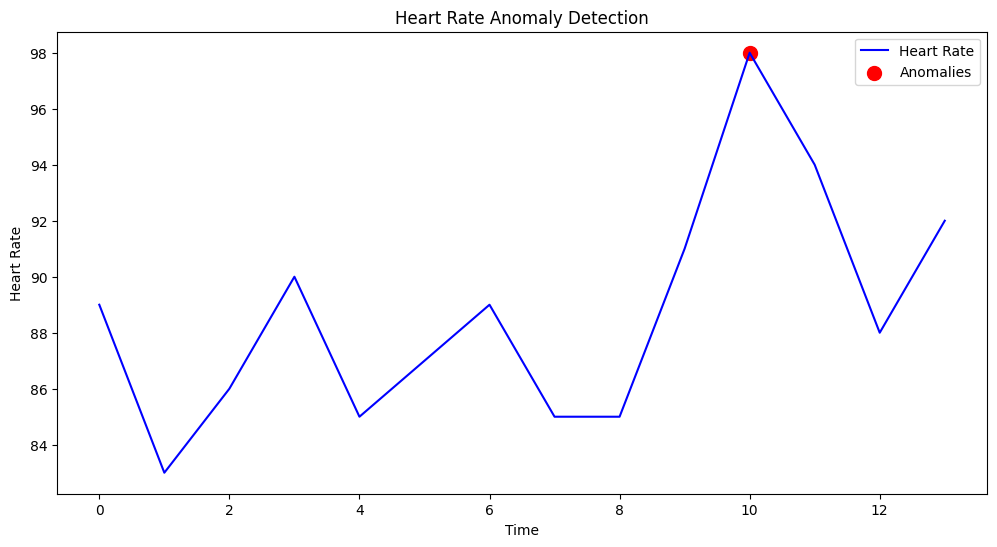

Anomalies:
          date  steps  heart_rate  anomaly
10  23/10/2023    478          98       -1


In [25]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Load your heart rate data (replace 'your_data.csv' with the actual data file)
data = pd.read_csv('data.csv')

# Select the heart rate values for anomaly detection
heart_rate_data = data['heart_rate'].values.reshape(-1, 1)

# Create and fit an Isolation Forest model
model = IsolationForest(contamination=0.05, random_state=42)  # Adjust contamination as needed
model.fit(heart_rate_data)

# Predict anomalies (1 for inliers, -1 for outliers)
anomaly_predictions = model.predict(heart_rate_data)

# Add anomaly predictions as a new column in the dataset
data['anomaly'] = anomaly_predictions

# Visualize anomalies
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['heart_rate'], label='Heart Rate', color='b')
plt.scatter(data[data['anomaly'] == -1].index, data[data['anomaly'] == -1]['heart_rate'], label='Anomalies', color='r', s=100)
plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.title('Heart Rate Anomaly Detection')
plt.legend()
plt.show()

# Print the data points identified as anomalies
anomalies = data[data['anomaly'] == -1]
print("Anomalies:")
print(anomalies)


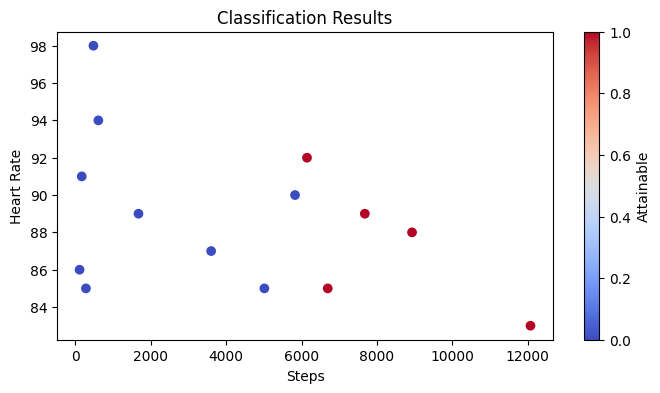

Your weight loss goal is attainable with your current activity level.


c:\Users\SAJITH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# Load the limited dataset
data = pd.read_csv('data.csv')  # Replace 'your_dataset.csv' with the actual dataset path

# Define a binary target variable: 1 for attainable, 0 for not attainable
data['attainable'] = (data['steps'] >= 6000).astype(int)  # Adjust the threshold as needed

# Split the data into features and target for classification
X_class = data[['steps', 'heart_rate']]
y_class = data['attainable']

# Split the data for classification into training and testing sets
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Create and train a classification model (e.g., RandomForest)
clf = RandomForestClassifier()
clf.fit(X_class_train, y_class_train)

# Make predictions for classification
y_class_pred = clf.predict(X_class_test)

# Visualize the classification results
plt.figure(figsize=(8, 4))
plt.scatter(data['steps'], data['heart_rate'], c=data['attainable'], cmap='coolwarm')
plt.xlabel('Steps')
plt.ylabel('Heart Rate')
plt.title('Classification Results')
plt.colorbar(label='Attainable')
plt.show()

# Inform the user if their goal is attainable
user_steps = 7000  # Replace with the user's actual daily steps
user_heart_rate = 90  # Replace with the user's actual heart rate

if clf.predict([[user_steps, user_heart_rate]]) == 1:
    print("Your weight loss goal is attainable with your current activity level.")
else:
    # Use a regression model to estimate the required increase in daily steps
    # Modify the X_reg and y_reg data to include more users with different steps and heart rates
    X_reg = data[data['attainable'] == 1][['steps', 'heart_rate']]
    y_reg = data[data['attainable'] == 1]['steps']

    # Create and train a regression model (e.g., Linear Regression)
    reg = LinearRegression()
    reg.fit(X_reg, y_reg)

    # Predict additional steps required for weight loss
    required_steps = reg.predict([[user_steps, user_heart_rate]])

    print(f"You need to increase your daily steps by approximately {required_steps[0]:.2f} steps next week to reach your weight loss goal.")
